In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

In [2]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../../Data/BaseData.csv')
base.shape

(2580, 299)

In [91]:
large = base[base['SalePrice']>300000]

In [93]:
large.head(3)

,Unnamed: 0,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
29,29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,30,528106110,2046,450000,105.0,15431,10,5,2005,2006,400.0,1430.0,0.0,564.0,1994.0,2046,0,0,1.0,0.0,2,1,2,1,7,2,2005.0,3.0,878.0,188,65,0,0,175,0,0
45,45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,46,528118010,2376,325300,101.0,14215,8,5,2005,2006,380.0,0.0,0.0,1158.0,1158.0,1158,1218,0,0.0,0.0,3,1,4,1,9,1,2005.0,3.0,853.0,240,154,0,0,0,0,0
56,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,57,528110070,1973,395000,110.0,14226,8,5,2006,2006,375.0,0.0,0.0,1935.0,1935.0,1973,0,0,0.0,0.0,2,0,3,1,9,1,2006.0,3.0,895.0,315,45,0,0,0,0,0


In [75]:
large = base[base['SalePrice']>300000]

In [76]:
large

,Unnamed: 0,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
29,29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,30,528106110,2046,450000,105.0,15431,10,5,2005,2006,400.0,1430.0,0.0,564.0,1994.0,2046,0,0,1.0,0.0,2,1,2,1,7,2,2005.0,3.0,878.0,188,65,0,0,175,0,0
45,45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,46,528118010,2376,325300,101.0,14215,8,5,2005,2006,380.0,0.0,0.0,1158.0,1158.0,1158,1218,0,0.0,0.0,3,1,4,1,9,1,2005.0,3.0,853.0,240,154,0,0,0,0,0
56,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,57,528110070,1973,395000,110.0,14226,8,5,2006,2006,375.0,0.0,0.0,1935.0,1935.0,1973,0,0,0.0,0.0,2,0,3,1,9,1,2006.0,3.0,895.0,315,45,0,0,0,0,0
58,58,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,59,528365060,2418,341000,96.0,10542,7,5,1993,1994,651.0,1173.0,0.0,138.0,1311.0,1325,1093,0,1.0,0.0,2,1,3,1,9,1,1993.0,3.0,983.0,250,154,216,0,0,0,0
63,63,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,64,528118030,2748,390000,108.0,13418,9,5,2006,2006,270.0,1420.0,0.0,430.0,1850.0,1850,898,0,1.0,0.0,2,1,4,1,9,1,2006.0,3.0,850.0,212,182,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2460,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,644,527256030,2234,441929,85.0,14082,8,5,2006,2006,945.0,1558.0,0.0,662.0,2220.0,2234,0,0,1.0,0.0,1,1,1,1,7,1,2006.0,2.0,724.0,390,80,0,0,0,0,0
2471,2471,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,655,528386040,3238,410000,56.0,14720,8,5,1995,1996,579.0,816.0,0.0,1217.0,2033.0,2053,1185,0,1.0,0.0,2,1,4,1,9,1,1996.0,3.0,666.0,283,86,0,0,0,0,0
2496,2496,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,680,528110010,2296,451950,97.0,13478,10,5,2008,2008,420.0

In [77]:
from sklearn.feature_selection import SequentialFeatureSelector

In [78]:
y=large.SalePrice
X=large.drop('SalePrice', axis=1)

In [79]:
large_simple = LinearRegression()

In [80]:
sfs_foreward = SequentialFeatureSelector(
    large_simple, n_features_to_select=1, direction="forward"
).fit(X, y)

In [81]:
selected = X.columns[sfs_foreward.get_support()]
selected

Index(['TotalBsmtSF'], dtype='object')

In [82]:
X = large[selected]
X.head(3)

,TotalBsmtSF
29,1994.0
45,1158.0
56,1935.0


In [83]:
large_simple.fit(X,y)

LinearRegression()

In [84]:
large_simple.score(X,y)

0.3037698180079387

In [85]:
X = large[selected].values.reshape(-1,1)
y = large.SalePrice.values.reshape(-1,1)

In [86]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [87]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [88]:
LARGE_B = evaluate_model(large_simple, X,y)
LARGE_B

,fit_time,score_time,test_r2,test_neg_mae
0,0.001022,0.000387,0.407548,-50524.238500
1,0.001459,0.000543,0.201430,-49745.795806
2,0.001288,0.000461,0.513319,-33582.542561
3,0.001208,0.000393,0.403306,-37246.131821
4,0.003075,0.001253,-0.007458,-53782.419997
5,0.001078,0.000424,0.423310,-42128.687031
6,0.001226,0.000392,0.263742,-45272.773868
7,0.001074,0.000342,0.303039,-44451.356438
8,0.001370,0.001048,0.209388,-48194.111814
9,0.000802,0.000345,0.082453,-45342.055997


In [89]:
LARGE.describe()

,fit_time,score_time,test_r2,test_neg_mae
count,15.000000,15.000000,15.000000,15.000000
mean,0.000959,0.000480,0.265710,-44945.971506
std,0.000614,0.000328,0.148976,6943.386849
min,0.000365,0.000273,-0.007458,-55768.684792
25%,0.000448,0.000293,0.205409,-50135.017153
50%,0.001018,0.000379,0.277442,-45272.773868
75%,0.001247,0.000479,0.375978,-41854.014201
max,0.002680,0.001470,0.513319,-31714.252514


In [50]:
large_simple.fit(X,y)
response = large_simple.predict(X)
r2 = large_simple.score(X,y)

In [51]:
response

array([[402108.39522708],
       [322988.5271361 ],
       [396524.57678525],
       [337468.59868863],
       [388480.0925894 ],
       [453309.17110892],
       [364819.84495454],
       [446021.81483738],
       [432961.35814294],
       [355545.02788167],
       [376744.60976251],
       [428323.94960651],
       [400594.13937845],
       [409963.59744185],
       [335481.13788731],
       [482742.51916669],
       [412897.46814858],
       [350907.61934524],
       [442236.17521581],
       [374851.78995172],
       [397944.19164334],
       [330181.2424171 ],
       [407029.72673513],
       [454918.06794809],
       [404947.62494326],
       [390183.63041911],
       [402865.52315139],
       [417156.31272285],
       [387722.96466508],
       [389237.22051371],
       [415547.41588368],
       [353368.28509926],
       [387155.11872185],
       [388480.0925894 ],
       [344850.59595071],
       [342579.21217776],
       [338036.44463187],
       [311253.04430921],
       [3994

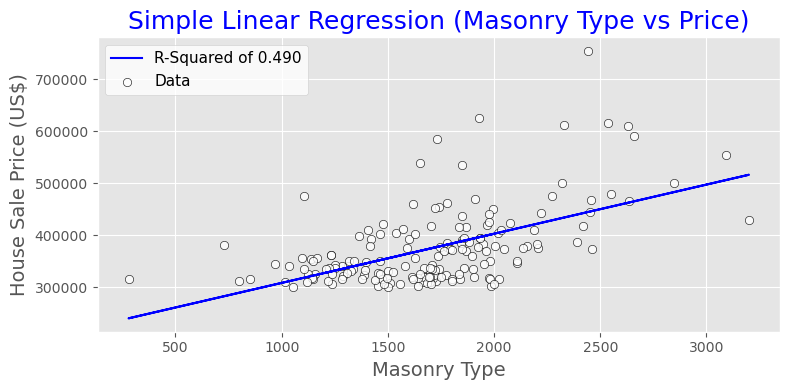

In [53]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.490')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Masonry Type', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Masonry Type vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [54]:
X = large['GrLivArea'].values.reshape(-1,1)
y = large.SalePrice.values.reshape(-1,1)

In [55]:
LARGE_G = evaluate_model(large_simple, X,y)
LARGE_G

,fit_time,score_time,test_r2,test_neg_mae
0,0.001166,0.000426,0.093037,-57736.039626
1,0.001429,0.000428,0.348672,-48696.864533
2,0.001143,0.000386,-0.120257,-57550.684221
3,0.001250,0.000443,0.017918,-44810.493275
4,0.002582,0.001561,0.411364,-44726.830616
5,0.000972,0.000366,0.133306,-61728.202913
6,0.001076,0.000365,0.414836,-45243.001713
7,0.001058,0.000347,-0.001775,-47954.543525
8,0.000579,0.000318,0.280496,-45025.342174
9,0.000370,0.000275,-0.391747,-55206.701393


In [57]:
large_simple.fit(X,y)
response = large_simple.predict(X)
r2 = large_simple.score(X,y)

In [58]:
response

array([[357412.27861173],
       [380473.67124665],
       [352310.81902885],
       [383408.75758201],
       [406470.15021693],
       [387042.67399721],
       [329878.37346579],
       [388440.3341569 ],
       [374463.73255998],
       [319395.92226809],
       [335049.71605665],
       [373485.37044819],
       [352660.23406877],
       [360976.31201894],
       [388719.86618884],
       [402836.23380173],
       [362723.38721856],
       [410802.89671198],
       [386623.3759493 ],
       [421005.81587773],
       [350703.5098452 ],
       [394450.27284358],
       [357412.27861173],
       [392773.08065195],
       [358600.28974747],
       [344973.10319046],
       [355455.55438816],
       [399132.43437855],
       [343156.14498286],
       [344833.3371745 ],
       [356713.44853188],
       [399551.73242646],
       [471042.04959472],
       [402975.9998177 ],
       [394869.57089149],
       [402416.93575382],
       [381102.61831851],
       [359648.53486724],
       [3518

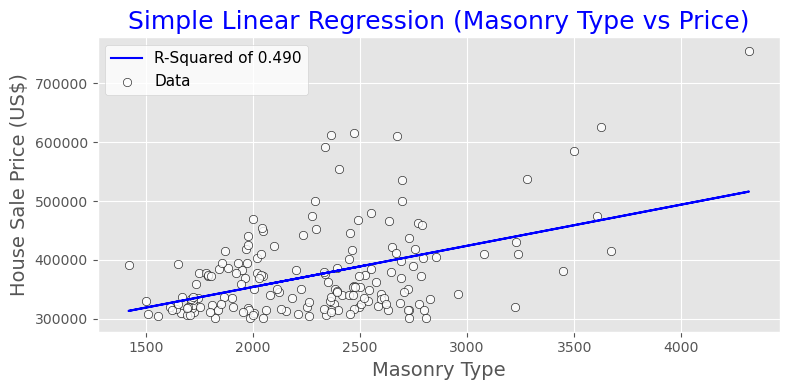

In [59]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.490')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Masonry Type', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Masonry Type vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

### SLR With SFS (n=1) ###

In [3]:
from sklearn.feature_selection import SequentialFeatureSelector

In [4]:
y=base.SalePrice
X=base.drop('SalePrice', axis=1)

In [5]:
simple = LinearRegression()

In [6]:
sfs_foreward = SequentialFeatureSelector(
    simple, n_features_to_select=1, direction="forward"
).fit(X, y)

In [7]:
selected = X.columns[sfs_foreward.get_support()]
selected

Index(['OverallQual'], dtype='object')

In [8]:
X = base[selected]
X.head(3)

,OverallQual
0,6
1,5
2,5


In [9]:
simple.fit(X,y)

LinearRegression()

In [10]:
simple.score(X,y)

0.6248925373371652

In [11]:
X = base[selected].values.reshape(-1,1)
y = base.SalePrice.values.reshape(-1,1)

In [12]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [13]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [14]:
SLR = evaluate_model(simple, X,y)
SLR

,fit_time,score_time,test_r2,test_neg_mae
0,0.001345,0.000386,0.601363,-34340.886374
1,0.001486,0.000485,0.604992,-31981.389047
2,0.001427,0.000427,0.631919,-32759.791911
3,0.001362,0.000408,0.612772,-31660.319528
4,0.001386,0.000466,0.664951,-31736.539341
5,0.001319,0.000402,0.620319,-34492.081338
6,0.001472,0.000445,0.654626,-29706.637430
7,0.001226,0.000338,0.612257,-31577.831206
8,0.000757,0.000329,0.645844,-31812.568471
9,0.001564,0.000359,0.592861,-34796.586668


In [15]:
#SLR = SLR[0][['test_r2', 'test_neg_mae']]
SLR = SLR.assign(MAE = SLR['test_neg_mae'].abs())
SLR = SLR.rename(columns = {'test_r2':'SLR R2 Qual', 'MAE':'SLR MAE Qual'})
SLR

,fit_time,score_time,SLR R2 Qual,test_neg_mae,SLR MAE Qual
0,0.001345,0.000386,0.601363,-34340.886374,34340.886374
1,0.001486,0.000485,0.604992,-31981.389047,31981.389047
2,0.001427,0.000427,0.631919,-32759.791911,32759.791911
3,0.001362,0.000408,0.612772,-31660.319528,31660.319528
4,0.001386,0.000466,0.664951,-31736.539341,31736.539341
5,0.001319,0.000402,0.620319,-34492.081338,34492.081338
6,0.001472,0.000445,0.654626,-29706.637430,29706.637430
7,0.001226,0.000338,0.612257,-31577.831206,31577.831206
8,0.000757,0.000329,0.645844,-31812.568471,31812.568471
9,0.001564,0.000359,0.592861,-34796.586668,34796.586668


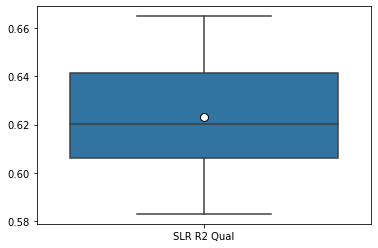

In [16]:
sns.boxplot(data=SLR[['SLR R2 Qual']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [17]:
SLR.describe()

,fit_time,score_time,SLR R2 Qual,test_neg_mae,SLR MAE Qual
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.001424,0.000515,0.622983,-32489.244046,32489.244046
std,0.000360,0.000251,0.023780,1313.989441,1313.989441
min,0.000722,0.000326,0.582898,-34796.586668,29706.637430
25%,0.001332,0.000372,0.606316,-32929.759266,31774.553906
50%,0.001427,0.000409,0.620319,-32107.545641,32107.545641
75%,0.001545,0.000475,0.641334,-31774.553906,32929.759266
max,0.002052,0.001107,0.664951,-29706.637430,34796.586668


In [18]:
SLR.to_csv('SLR_Qual.csv', index=False)

In [19]:
simple.fit(X,y)
response = simple.predict(X)
r2 = simple.score(X,y)

In [20]:
r2

0.6248925373371652

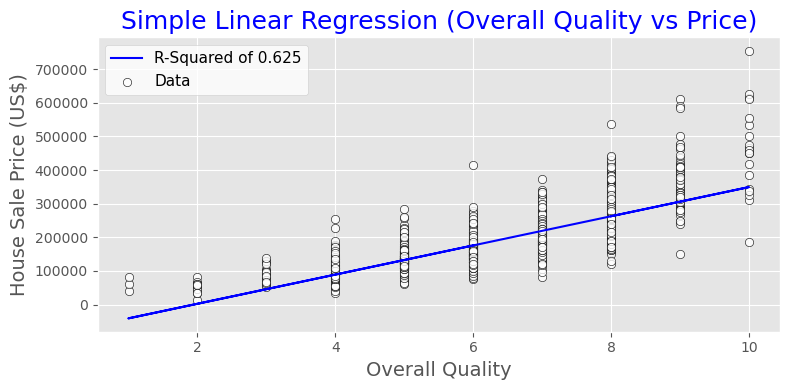

In [21]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.625')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Overall Quality', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Overall Quality vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()